# Visualizing FordGoBike Data
## (2017)

## Table of Contents

    Preliminary Wrangling

    Univariate Exploration

    Bivariate Explorationn

    Multivariate Exploration

    Summary

    Sources

# Preliminary Wrangling

In [95]:
#all package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import calendar
import datetime

**Loading in the dataset**

In [96]:
#load data
df=pd.read_csv('2017-fordgobike-tripdata.csv')

In [98]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [99]:
# Changing the format to datetime
df_cleaned.start_time = pd.to_datetime(df_cleaned.start_time)
df_cleaned.end_time = pd.to_datetime(df_cleaned.end_time)


In [38]:
# User type to category format
df_cleaned['user_type ']=df_cleaned.user_type.astype('category')

In [100]:
#Bike ID, start station ID, and end station ID to object format
df_cleaned['bike_id ']=df_cleaned.bike_id.astype(str)
df_cleaned['start_station_id  ']=df_cleaned.start_station_id .astype(str)
df_cleaned['end_station_id ']=df_cleaned.end_station_id.astype(str)

## What is the structure of your dataset?

The column header descriptions are as follows:

      Trip Duration:-
            .Start Time and Date

            .End Time and Date

      Start Station ID:-
            .Start Station Name
           
           .Start Station Latitude

           .Start Station Longitude

      End Station ID:-

           .End Station Name

           .End Station Latitude

          .End Station Longitude

          .Bike ID
      
      .User Type 
what i added:

        .Start Time Month
        
        .Start Time Month Number

        .Start Time Day of the Week
        
        .Start Time Hour
        
        .duration minute


## What are the main feature(s) of interest in your dataset?

I am most interested start time/location and end time/location

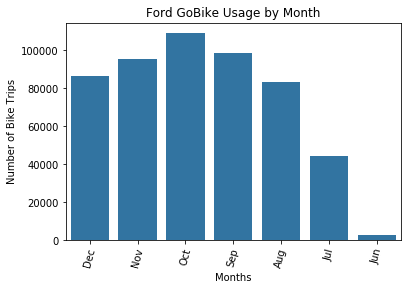

In [106]:
# Monthly usage of the Ford Go Bike system

base_color=sb.color_palette()[0]

sb.countplot(data=df_cleaned,x='start_month_char',color =base_color);
plt.xlabel("Months")
plt.ylabel("Number of Bike Trips")
plt.title('Ford GoBike Usage by Month')
plt.xticks(rotation=75);


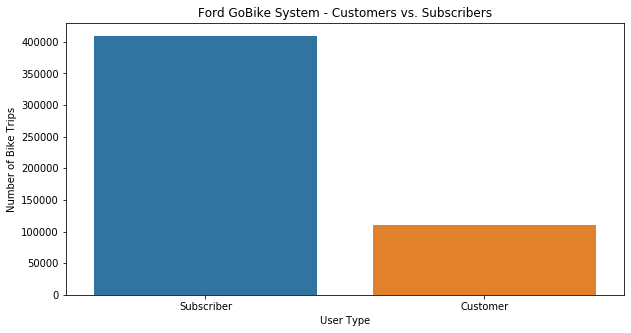

In [107]:
# Customers vs Subscribers Visuals
# bar chart
plt.figure(figsize = [10, 5])

sb.countplot(data = df_cleaned, x = "user_type",order=df_cleaned.user_type.value_counts().index);
plt.xlabel('User Type');
plt.ylabel('Number of Bike Trips');
plt.title('Ford GoBike System - Customers vs. Subscribers');

**observation1**

'Customer' bikers bike longer than 'Subscriber' bikers.


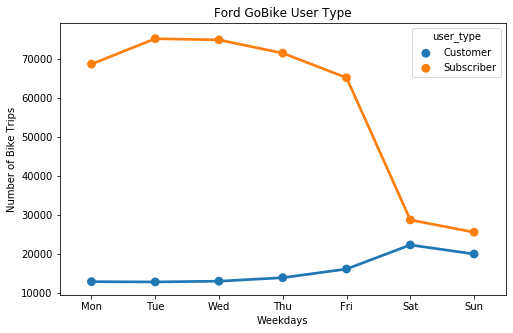

In [108]:
plt.figure(figsize=(8, 5))

df_cleaned_user_week = df_cleaned.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_cleaned_user_week, x='start_time_weekday',y=0, hue = 'user_type', order = weekday);

plt.title('Ford GoBike User Type')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');


**observation3**

 The point plot sharp contrast between Customers and Subscribers

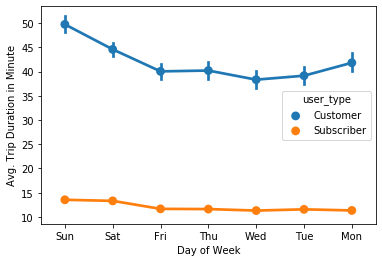

In [109]:
sb.pointplot(data=df_cleaned, x='start_time_weekday', y='duration_min', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

**observation1**

It can be seen from the above plot that subscribers ride much shorter/quicker trips compared to customers on each day of the week. 

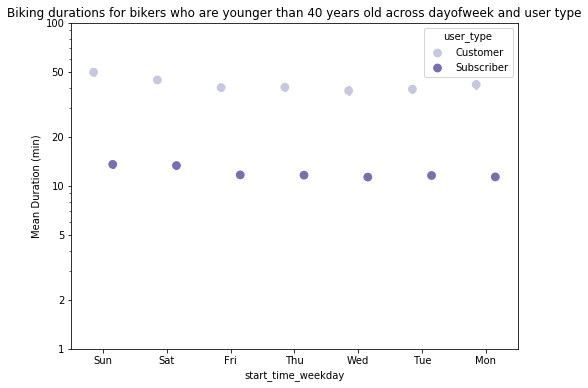

In [110]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data =df_cleaned, x = 'start_time_weekday', y = 'duration_min', hue = 'user_type',
           palette = 'Purples', linestyles = '', dodge = 0.3);
plt.title('Biking durations for bikers who are younger than 40 years old across dayofweek and user type');
plt.ylabel('Mean Duration (min)')
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

**observation3**

'Customer' bikers bike longer than 'Subscriber' bikers.


## Sources

.[FordGoBike Data Set](https://s3.amazonaws.com/baywheels-data/index.html)dataset


.[Matplotlib](https://matplotlib.org/)